In [1]:
from __future__ import division,print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input

%matplotlib inline

Using TensorFlow backend.


In [2]:
resnet_trained_model = load_model('saved_model/resnet_trained_final.h5')

In [3]:
test_path = '/home/t1/Desktop/projects/t1/data/blood_cells/dataset2-master/images/TEST_SIMPLE2/'

In [4]:
from glob import glob
test_images = glob(test_path + '*/*.jp*g')
folders = glob(test_path+'*')
folders

['/home/t1/udemy/advanced_cnn/data/blood_cells/dataset2-master/images/TEST_SIMPLE2/MONOCYTE',
 '/home/t1/udemy/advanced_cnn/data/blood_cells/dataset2-master/images/TEST_SIMPLE2/NEUTROPHIL',
 '/home/t1/udemy/advanced_cnn/data/blood_cells/dataset2-master/images/TEST_SIMPLE2/EOSINOPHIL',
 '/home/t1/udemy/advanced_cnn/data/blood_cells/dataset2-master/images/TEST_SIMPLE2/LYMPHOCYTE']

In [5]:
data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
IMAGE_SIZE = [224,224]

In [7]:
test_gen = data_gen.flow_from_directory(test_path,target_size = IMAGE_SIZE,batch_size=1)

Found 16 images belonging to 4 classes.


In [8]:
len(test_images)

16

In [9]:
test_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [10]:
labels = [None]*len(test_gen.class_indices)
for label,i in test_gen.class_indices.items():
    labels[i] = label
    
labels

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

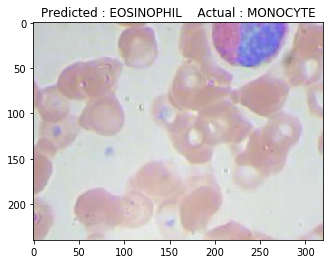

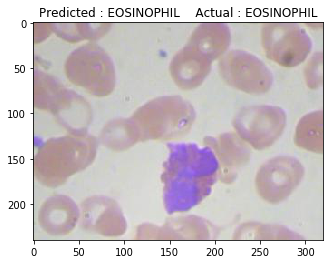

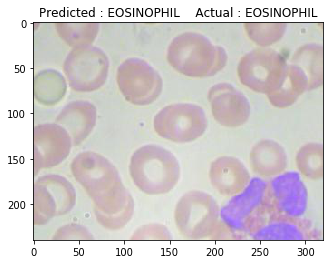

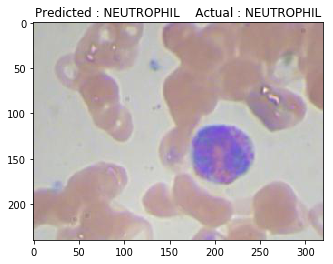

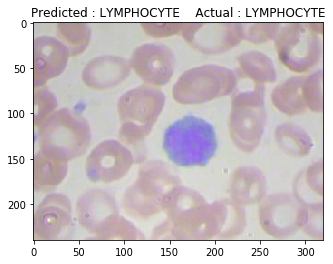

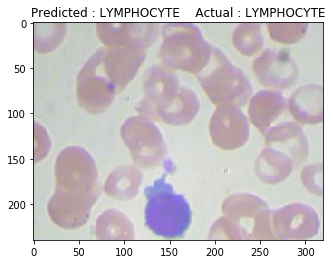

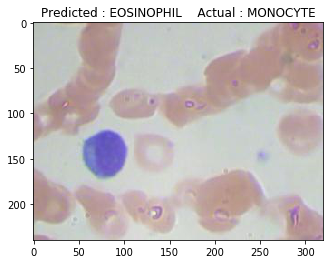

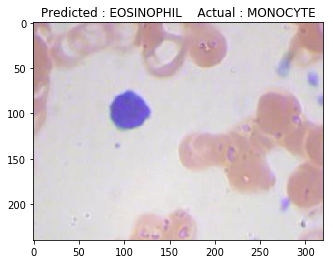

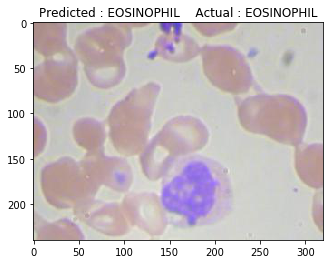

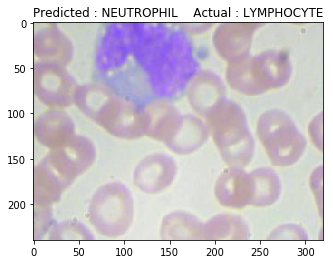

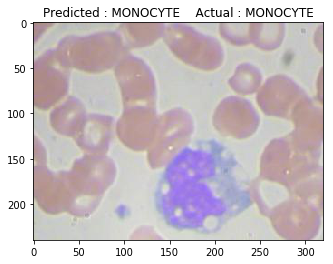

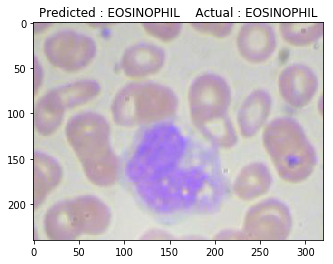

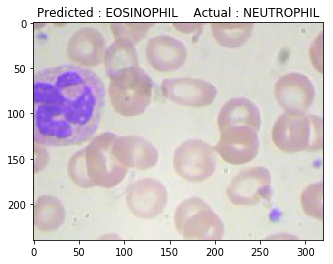

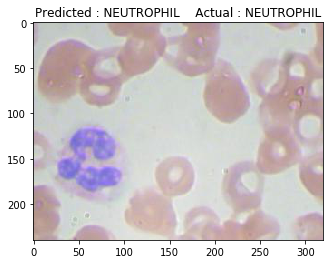

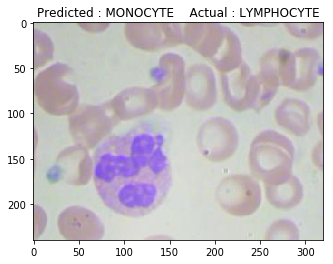

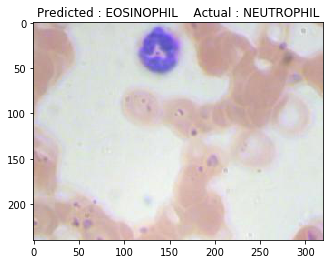

In [11]:
count = 0
for x,y in test_gen:
    temp = test_path + test_gen.filenames[test_gen.batch_index -1]
    img = plt.imread(temp)
    plt.figure()
    plt.imshow(img)
    p = resnet_trained_model.predict(x)
    p = np.argmax(p,axis=1).astype(np.int)
    y = np.argmax(y,axis=1).astype(np.int)
    plt.title('Predicted : {}    Actual : {}'.format(labels[p[0]],labels[y[0]]))
    count += 1
    if count >= 16:
        break